In [10]:
#Preparation

In [11]:
#Importing the libraries as required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [12]:
#Uploading the dataset for analysis
dataset = pd.read_csv('data.csv')
print(f'Dataset shape: {dataset.shape}')
dataset.head()

Dataset shape: (200, 5)


,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
#Formating the information in dataset
dataset = dataset.iloc[ : , 1:5]
dataset['Gender'].replace({'Male': 'M', 'Female': 'F'}, inplace = True)
dataset.head()

,Gender,Age,Income,Spending
0,M,19,15,39
1,M,21,15,81
2,F,20,16,6
3,F,23,16,77
4,F,31,17,40


In [14]:
#Standardizing the features of dataset
scaler = StandardScaler()
selected_features = scaler.fit_transform(dataset.iloc[ : , 1:4])
scaled_features = pd.DataFrame(selected_features, columns = dataset.columns[1:4])
dataset0 = pd.concat([dataset.iloc[:, [0]], scaled_features], axis = 1)
dataset0.head()

,Gender,Age,Income,Spending
0,M,-1.424569,-1.738999,-0.434801
1,M,-1.281035,-1.738999,1.195704
2,F,-1.352802,-1.700830,-1.715913
3,F,-1.137502,-1.700830,1.040418
4,F,-0.563369,-1.662660,-0.395980


In [15]:
#Splitting the dataset into segments
dataset1 = dataset.iloc[:, [0, 1]]
dataset2 = dataset.iloc[:, [0, 2]]
dataset3 = dataset.iloc[:, [0, 3]]
dataset4 = dataset.iloc[:, [1, 2]]
dataset5 = dataset.iloc[:, [1, 3]]
dataset6 = dataset.iloc[:, [2, 3]]

In [16]:
#Exploration

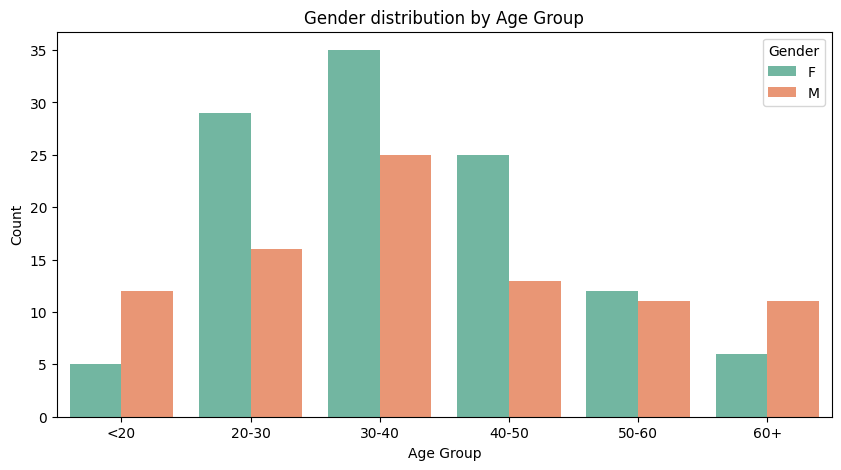

In [17]:
#Visualizing gender by age distribution
plt.figure(figsize = (10, 5))
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']
dataset1 = dataset.copy()
dataset1['Group'] = pd.cut(dataset1['Age'], bins = age_bins, labels = age_labels)
gender_by_age = dataset1.groupby(['Group', 'Gender'], observed = False).size().reset_index(name = 'Count')
sns.barplot(x = 'Group', y = 'Count', hue = 'Gender', data = gender_by_age, palette = 'Set2')
plt.title('Gender distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

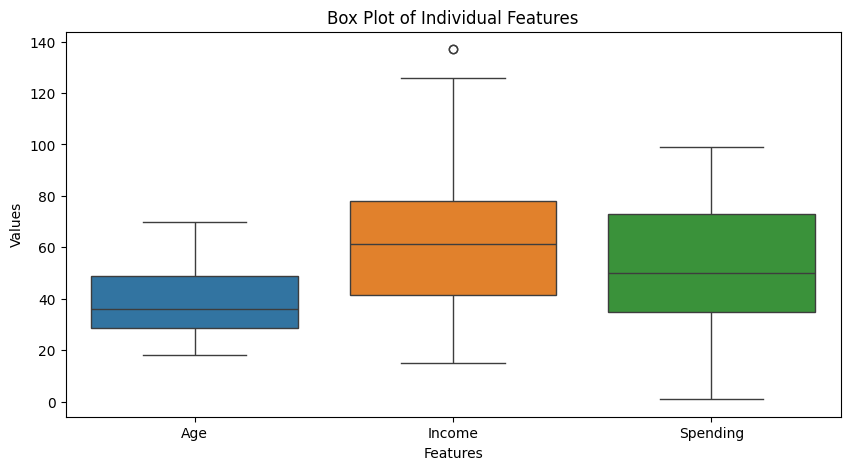

In [18]:
#Checking the datset for outliers
plt.figure(figsize = (10, 5))
sns.boxplot(data = dataset[['Age', 'Income', 'Spending']])
plt.title('Box Plot of Individual Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

<Figure size 1000x500 with 0 Axes>

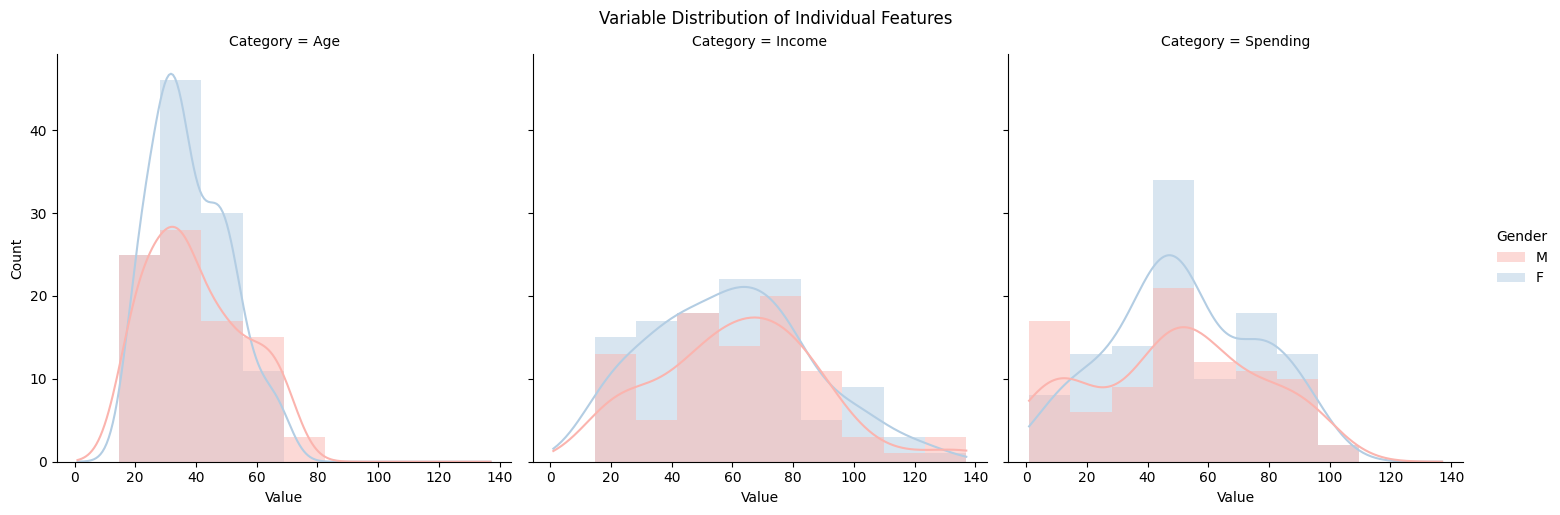

In [19]:
#Conducting univariate analysis on features
plt.figure(figsize = (10, 5))
long_data = pd.melt(dataset[['Age', 'Income', 'Spending', 'Gender']], id_vars = 'Gender', var_name = 'Category', value_name = 'Value')
g = sns.displot(long_data, x = 'Value', col = 'Category', hue = 'Gender', kde = True, bins = 10, edgecolor = None, palette = 'Pastel1')
g.fig.suptitle('Variable Distribution of Individual Features', y=1.02)
plt.show()

<Figure size 1000x500 with 0 Axes>

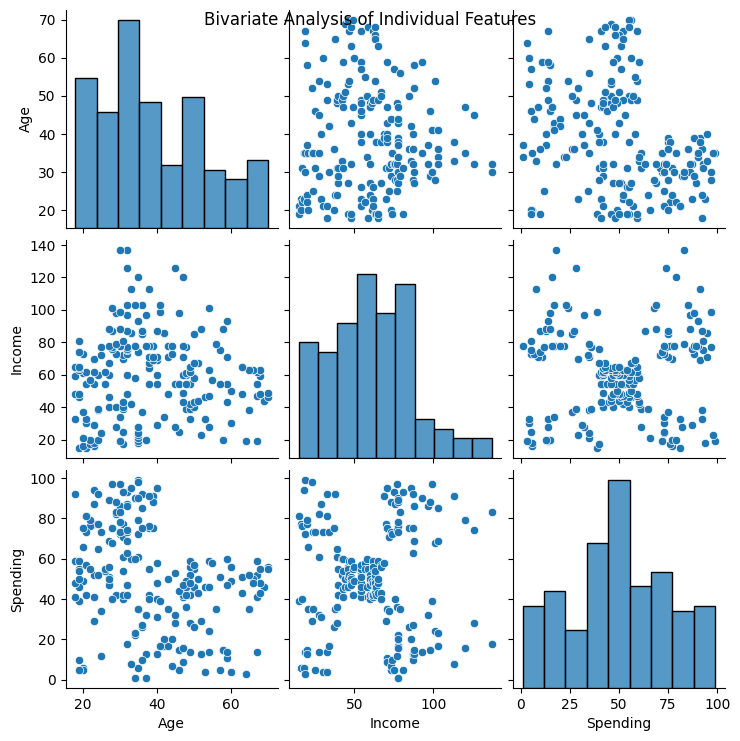

In [20]:
#Conducting bivariate analysis on features
plt.figure(figsize = (10, 5))
pairplot = sns.pairplot(dataset[['Age', 'Income', 'Spending']])
pairplot.fig.suptitle('Bivariate Analysis of Individual Features')
plt.show()

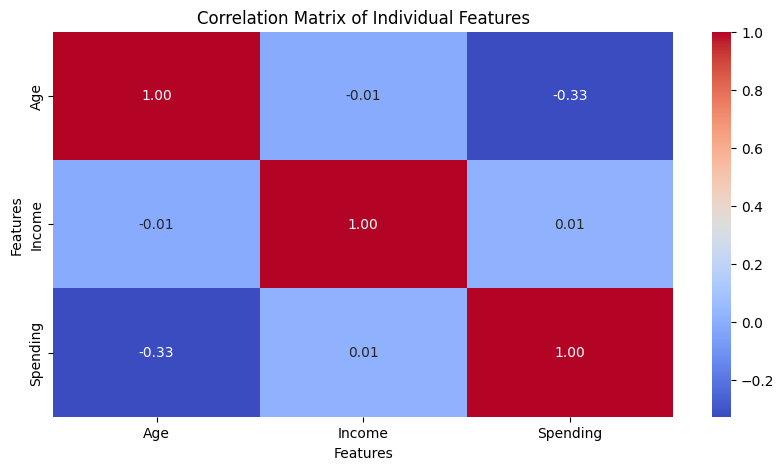

In [21]:
#Checking the correlation between features
plt.figure(figsize = (10, 5))
correlation_matrix = dataset[['Age', 'Income', 'Spending']].corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix of Individual Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [22]:
#Modelling

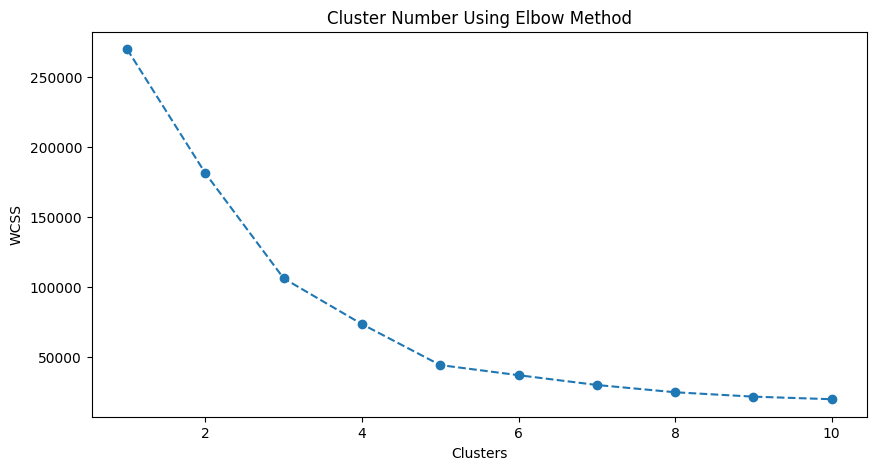

In [23]:
#Finding cluster number using elbow
plt.figure(figsize = (10, 5))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, random_state = 42)
    kmeans.fit(dataset6)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.title('Cluster Number Using Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

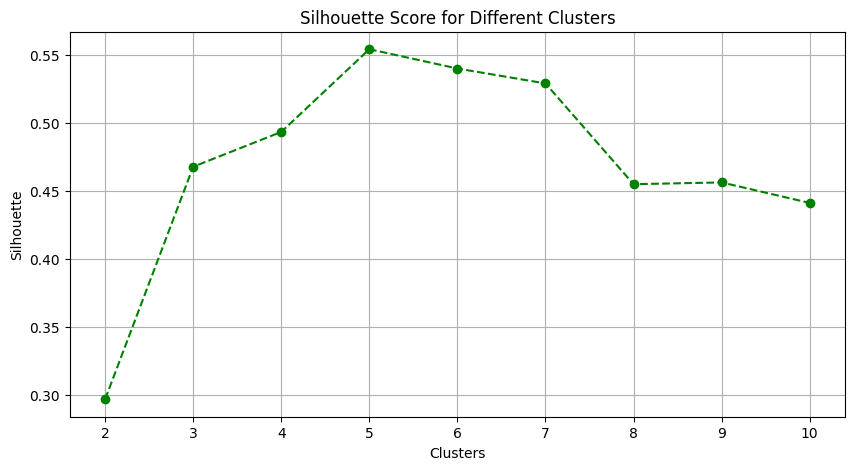

In [24]:
#Finding cluster number using silhouette
plt.figure(figsize=(10,5))
sil_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, random_state = 42)
    kmeans.fit(dataset6)
    labels = kmeans.labels_
    sil_score = silhouette_score(dataset6, labels)
    sil_scores.append(sil_score)
plt.plot(range(2, 11), sil_scores, marker = 'o', linestyle = '--', color = 'green')
plt.grid(True)
plt.title('Silhouette Score for Different Clusters')
plt.xlabel('Clusters')
plt.ylabel('Silhouette')
plt.show()

In [25]:
#Training the model for clustering
kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(dataset6)

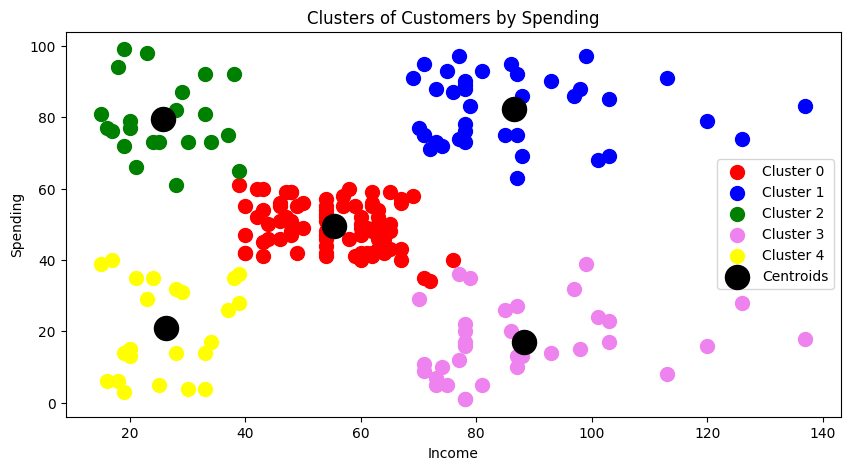

In [26]:
#Visualizing the result of clustering
plt.figure(figsize = (10, 5))
dataset6 = np.array(dataset6)
plt.scatter(dataset6[y_kmeans == 0, 0], dataset6[y_kmeans == 0, 1], s=100, c='red', label='Cluster 0')
plt.scatter(dataset6[y_kmeans == 1, 0], dataset6[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 1')
plt.scatter(dataset6[y_kmeans == 2, 0], dataset6[y_kmeans == 2, 1], s=100, c='green', label='Cluster 2')
plt.scatter(dataset6[y_kmeans == 3, 0], dataset6[y_kmeans == 3, 1], s=100, c='violet', label='Cluster 3')
plt.scatter(dataset6[y_kmeans == 4, 0], dataset6[y_kmeans == 4, 1], s=100, c='yellow', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[ : , 0], kmeans.cluster_centers_[ : , 1], s = 300, c = 'black', label = 'Centroids')
plt.legend()
plt.title('Clusters of Customers by Spending')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.show()

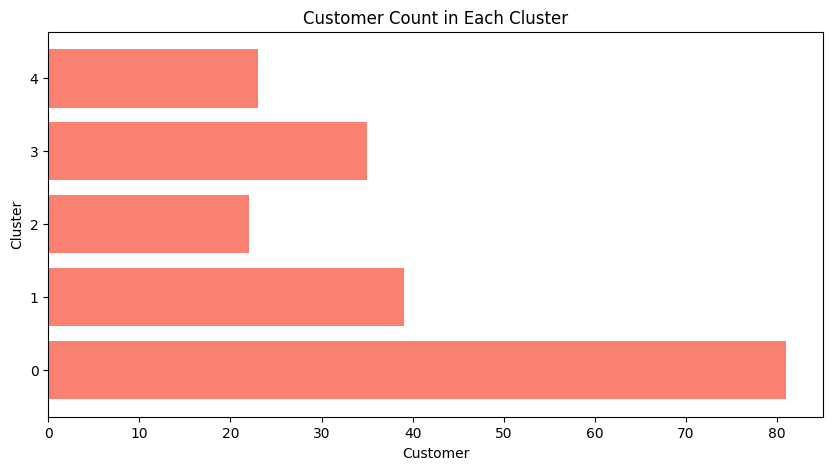

In [27]:
#Visualizing total count in clusters
plt.figure(figsize = (10, 5))
unique, counts = np.unique(y_kmeans, return_counts = True)
cluster_counts = dict(zip(unique, counts))
plt.barh(list(cluster_counts.keys()), cluster_counts.values(), color = 'salmon')
plt.title('Customer Count in Each Cluster')
plt.xlabel('Customer')
plt.ylabel('Cluster')
plt.show()

<Figure size 1000x500 with 0 Axes>

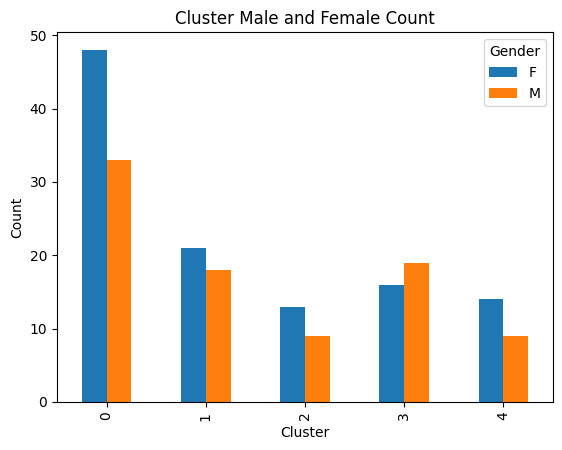

In [28]:
#Visualizing gender count in clusters
plt.figure(figsize = (10, 5))
df = dataset.copy()
df['Cluster'] = y_kmeans
gender_counts = df.groupby(['Cluster', 'Gender']).size().unstack(fill_value = 0)
gender_counts.plot(kind = 'bar')
plt.legend(title = 'Gender')
plt.title('Cluster Male and Female Count')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()